<a href="https://colab.research.google.com/github/guluzar-gb/stat_asg_2_ggb/blob/main/Statistics_Assignment_2_(CIs_%26_Hypothesis)_ggb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees.

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
# xbar=98.25
# sigma= 0.73
# n=130
# z*=2.58 #for 99% CI
#CI = x̄ ± z (σ/√n)*
CI_lower = 98.25 - 2.58 * 0.73/(130**0.5)
CI_upper = 98.25 + 2.58 * (0.73/130**0.5)
print(round(CI_lower,2))
print(round(CI_upper,2))

98.08
98.42


EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [3]:
# xbar=5.4
# sigma=3.1
# n=500
# z*=1.96 #for 95% CI

CI_lower = 5.4 - 1.96 * (3.1/500**0.5)
CI_upper= 5.4 + 1.96 * (3.1/500**0.5)
print(round(CI_lower,2))
print(round(CI_upper,2))

5.13
5.67


So, with 95% confidence that the true average length of stay for inpatient treatment of patients between the ages of 25 and 34 falls between 5.13 and 5.67 days.

HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [4]:
# H0: mu=13.20
# Ha: mu <13.20
mu_0=13.20

n=40
xbar=12.20
sigma=2.5
df=n-1

t = (xbar - mu_0) / (sigma / n**0.5)
t

-2.5298221281347035

p value from online  t distribution calculator= 0.008

since p value (0.008) <significance level (0.01) we can reject the null hypothesis and conclude that there is evidence to suggest that the company is paying substandard wages.

EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [48]:
import pandas as pd
import scipy.stats as stats
from math import sqrt
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind

In [6]:
df4 = pd.read_csv('soil - Sheet1.csv')

In [7]:
df4.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [38]:
df4 = df4.dropna()
df4.shape

(30, 2)

In [39]:
df4.describe()

,Soil1,Soil2
count,30.000000,30.000000
mean,1.691800,1.407633
std,0.206903,0.221512
min,1.110000,1.053000
25%,1.572000,1.216500
50%,1.675000,1.376000
75%,1.865250,1.553250
max,2.054000,1.878000


In [11]:
# Ho: mu1 = mu2
# Ha: mu1 != m2

In [69]:
# soil1 =stats.ttest_1samp (df4["Soil1"], 1.4076)
# soil1

In [67]:
t_statistic, p_value = ttest_ind(df4["Soil1"], df4["Soil2"], equal_var=True)

In [68]:
print(t_statistic, p_value)

5.134893443609086 3.4402046436336477e-06


In [71]:
alpha = 0.01
if p_value<alpha:
    print('At {} level of significance,  there is sufficient evidence to suggest that the two soil types differ with respect to average shear strength.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance,  there is sufficient evidence to suggest that the two soil types differ with respect to average shear strength.


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [14]:
df5 = pd.read_csv('2015 PISA Test - Sheet1.csv')


In [17]:
df5.shape

(70, 6)

In [18]:
df5.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [19]:
df5.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [20]:
df5[df5.Continent_Code=="EU"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [21]:
df5[df5.Continent_Code=="AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [22]:
df5[df5.Continent_Code=="SA"].describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [23]:
df5[df5.Continent_Code=="OC"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [24]:
df5[df5.Continent_Code=="AF"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [26]:
df5 = df5.dropna()
df5.shape

(65, 6)

In [42]:
df5.shape[0]

65

In [35]:
sem = df5["Math"].std() / np.sqrt(df5.shape[0])
sem

6.36221560008167

In [55]:
sem_eu = df5.loc[df5['Continent_Code'] == 'EU', 'Math'].std() / np.sqrt(df5.shape[0])
sem_eu

4.359870860577328

In [56]:
sem_as = df5.loc[df5['Continent_Code'] == 'AS', 'Math'].std() / np.sqrt(df5.shape[0])
sem_as

7.982440172711936

In [45]:
eu_math = df5.loc[df5['Continent_Code'] == 'EU', 'Math']
as_math = df5.loc[df5['Continent_Code'] == 'AS', 'Math']

In [46]:
#Calculate the means and standard deviations of the two samples:
eu_mean = eu_math.mean()
as_mean = as_math.mean()
eu_std = eu_math.std()
as_std = as_math.std()

In [49]:
t_statistic, p_value = ttest_ind(eu_math, as_math, equal_var=True)

The ttest_ind() function calculates the t-statistic and p-value for the two-sample t-test. The equal_var=True argument assumes that the variances of the two samples are equal.

In [51]:
print(t_statistic, p_value)

0.870055317967983 0.38826888111307345


In [66]:
alpha = 0.05
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


In [ ]:
# z_score = (sample_mean - pop_mean) / sem
# p_value = 2 * (1 - norm.cdf(abs(z_score)))

In [57]:
ci_z = stats.norm.interval(0.95, eu_math.mean(), sem_eu)
ci_z

(469.43625878467145, 486.5266385126259)

In [58]:
ci_z = stats.norm.interval(0.95, as_math.mean(), sem_as)
ci_z

(450.5713518115624, 481.86194230608453)

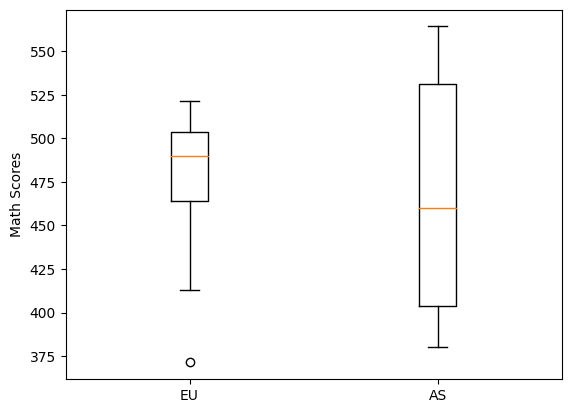

In [59]:
plt.boxplot([eu_math, as_math], labels=['EU', 'AS'])
plt.ylabel('Math Scores')
plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

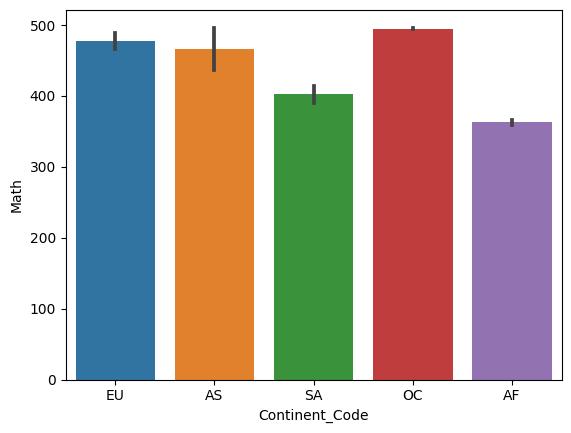

In [30]:
sns.barplot(x="Continent_Code", y="Math", data=df5, errorbar=('ci', 95));